<a href="https://colab.research.google.com/github/ENG19CS0334-TEJAAL-M/AI-ML/blob/main/SEM1/ACI/minmax%2Bprolog_rules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Decision Tree Rules:

|--- Time <= 8.12
|   |--- age <= 45.50
|   |   |--- class: 1
|   |--- age >  45.50
|   |   |--- class: 0
|--- Time >  8.12
|   |--- age <= 16.50
|   |   |--- class: 1
|   |--- age >  16.50
|   |   |--- Type <= 2.50
|   |   |   |--- Area <= 15.00
|   |   |   |   |--- class: 0
|   |   |   |--- Area >  15.00
|   |   |   |   |--- Area <= 27.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Area >  27.50
|   |   |   |   |   |--- Area <= 98.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Area >  98.00
|   |   |   |   |   |   |--- Number_of_Warts <= 5.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Number_of_Warts >  5.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |--- Type >  2.50
|   |   |   |--- class: 0



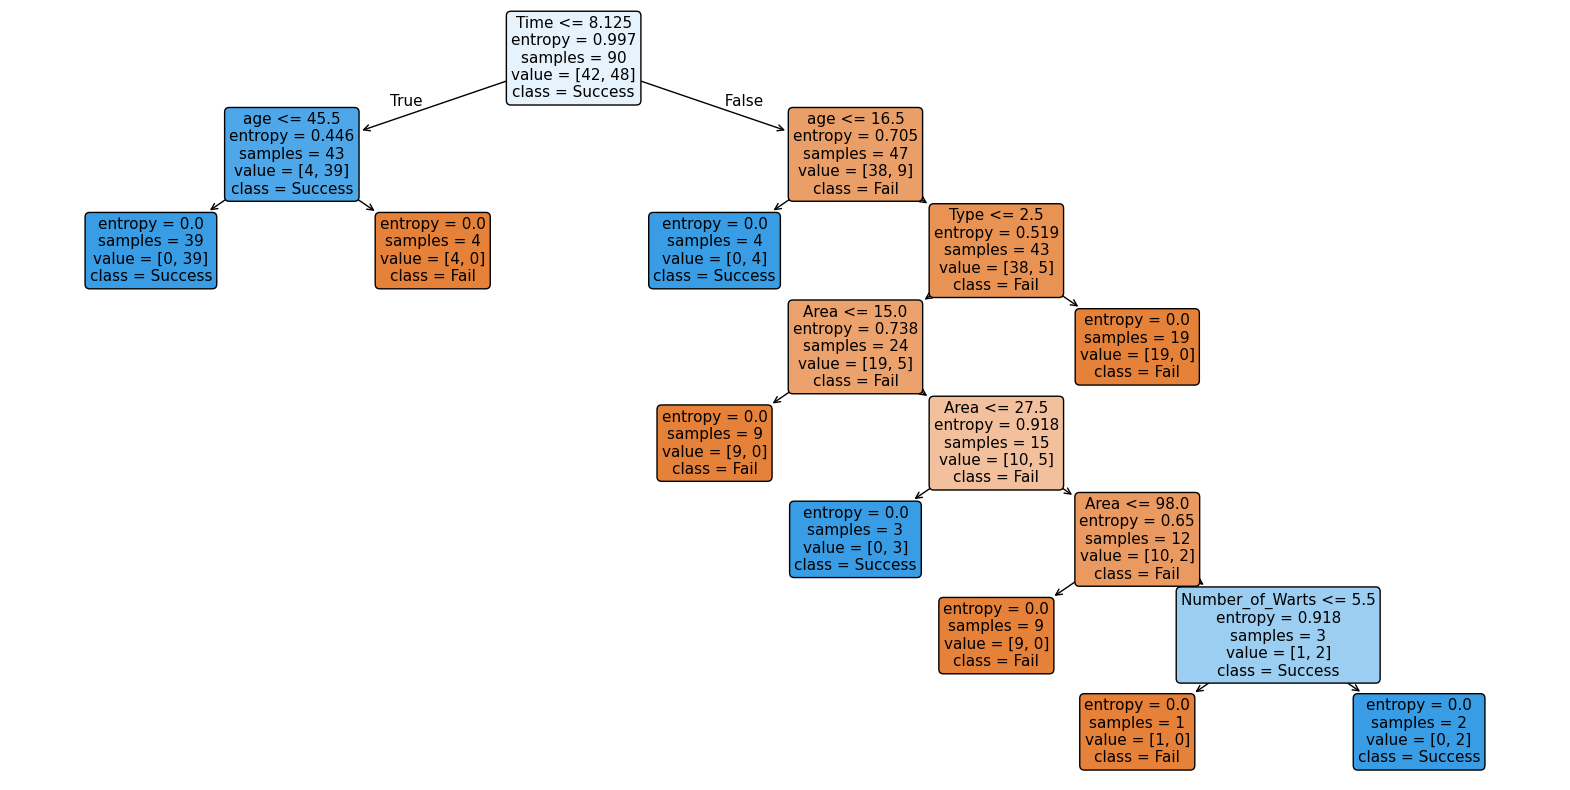

In [ ]:
# Cryotherapy Decision Tree (Full Depth)

import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
import matplotlib.pyplot as plt

# Load dataset
file_path = "Cryotherapy.csv.xlsx - CrayoDataset.csv"
df = pd.read_csv(file_path)

# Features and target
X = df.drop("Result_of_Treatment", axis=1)
y = df["Result_of_Treatment"]

# Train full-depth decision tree
clf = DecisionTreeClassifier(criterion="entropy", random_state=42)
clf.fit(X, y)

# Show rules
rules_text = export_text(clf, feature_names=list(X.columns))
print("Decision Tree Rules:\n")
print(rules_text)

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=list(X.columns),
          class_names=["Fail", "Success"],
          filled=True, rounded=True)
plt.show()


In [ ]:
import math
import copy

# Piece values
PIECE_VALUES = {"P": 1, "N": 3}  # Pawn = 1, Knight = 3

# Initial board (W = White, B = Black)
# P = Pawn, N = Knight
board = [
    ["WP", "WN", "--"],
    ["--", "--", "--"],
    ["--", "BP", "BN"]
]

# Print board
def print_board(b):
    for row in b:
        print(" ".join(row))
    print()

# Evaluation function
def evaluate(b):
    score = 0
    for row in b:
        for cell in row:
            if cell != "--":
                color, piece = cell[0], cell[1]
                value = PIECE_VALUES[piece]
                if color == "W":
                    score += value
                else:
                    score -= value
    return score

# Generate moves
def generate_moves(b, color):
    moves = []
    directions_pawn = {"W": (-1, 0), "B": (1, 0)}
    attacks_pawn = {"W": [(-1, -1), (-1, 1)], "B": [(1, -1), (1, 1)]}
    knight_moves = [(-2, -1), (-2, 1), (2, -1), (2, 1), (-1, -2), (1, -2), (-1, 2), (1, 2)]

    for r in range(3):
        for c in range(3):
            piece = b[r][c]
            if piece.startswith(color):
                p_type = piece[1]

                if p_type == "P":  # Pawn
                    dr, dc = directions_pawn[color]
                    nr, nc = r + dr, c + dc
                    if 0 <= nr < 3 and 0 <= nc < 3 and b[nr][nc] == "--":
                        new_b = copy.deepcopy(b)
                        new_b[nr][nc], new_b[r][c] = piece, "--"
                        moves.append(new_b)
                    # Attacks
                    for dr, dc in attacks_pawn[color]:
                        nr, nc = r + dr, c + dc
                        if 0 <= nr < 3 and 0 <= nc < 3 and b[nr][nc] != "--" and not b[nr][nc].startswith(color):
                            new_b = copy.deepcopy(b)
                            new_b[nr][nc], new_b[r][c] = piece, "--"
                            moves.append(new_b)

                elif p_type == "N":  # Knight
                    for dr, dc in knight_moves:
                        nr, nc = r + dr, c + dc
                        if 0 <= nr < 3 and 0 <= nc < 3 and (b[nr][nc] == "--" or not b[nr][nc].startswith(color)):
                            new_b = copy.deepcopy(b)
                            new_b[nr][nc], new_b[r][c] = piece, "--"
                            moves.append(new_b)
    return moves

# Minimax Algorithm
def minimax(b, depth, alpha, beta, isMax):
    if depth == 0:
        return evaluate(b), b

    color = "W" if isMax else "B"
    moves = generate_moves(b, color)
    if not moves:
        return evaluate(b), b

    if isMax:
        maxEval, bestMove = -math.inf, None
        for move in moves:
            eval_score, _ = minimax(move, depth-1, alpha, beta, False)
            if eval_score > maxEval:
                maxEval, bestMove = eval_score, move
            alpha = max(alpha, eval_score)
            if beta <= alpha:
                break
        return maxEval, bestMove
    else:
        minEval, bestMove = math.inf, None
        for move in moves:
            eval_score, _ = minimax(move, depth-1, alpha, beta, True)
            if eval_score < minEval:
                minEval, bestMove = eval_score, move
            beta = min(beta, eval_score)
            if beta <= alpha:
                break
        return minEval, bestMove

# Main game loop
def play():
    global board
    print("Initial Board:")
    print_board(board)

    while True:
        # Human (White) Move
        print("Your turn! (White)")
        r1, c1 = map(int, input("Enter piece position (row col): ").split())
        r2, c2 = map(int, input("Enter target position (row col): ").split())

        if board[r1][c1].startswith("W"):
            piece = board[r1][c1]
            temp_board = copy.deepcopy(board)
            temp_board[r2][c2], temp_board[r1][c1] = piece, "--"
            board = temp_board
        else:
            print("Invalid move! Try again.")
            continue

        print("Board after your move:")
        print_board(board)

        # Check if Black lost
        if not any("B" in cell for row in board for cell in row):
            print("You win!")
            break

        # AI (Black) Move
        print("AI is thinking...")
        _, bestMove = minimax(board, 3, -math.inf, math.inf, False)
        board = bestMove

        print("Board after AI move:")
        print_board(board)

        # Check if White lost
        if not any("W" in cell for row in board for cell in row):
            print("AI wins!")
            break

play()


Initial Board:
WP WN --
-- -- --
-- BP BN

Your turn! (White)
Enter piece position (row col): 1 2
Enter target position (row col): 1 2
Invalid move! Try again.
Your turn! (White)
Enter piece position (row col): 0 1 
Enter target position (row col): 2 2
Board after your move:
WP -- --
-- -- --
-- BP WN

AI is thinking...
Board after AI move:
WP -- --
-- -- --
-- BP WN

Your turn! (White)
Enter piece position (row col): 0 0
Enter target position (row col): 2 1
Board after your move:
-- -- --
-- -- --
-- WP WN

You win!
